In [596]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector as cnt
import seaborn as sns


In [597]:
plt.style.use('ggplot')

In [598]:
DB = cnt.connect(
    host='localhost',
    user='root',
    password="qwertyuiop",
    port=3306,
    )
c = DB.cursor()

In [599]:
c.execute("use octoberfest") 

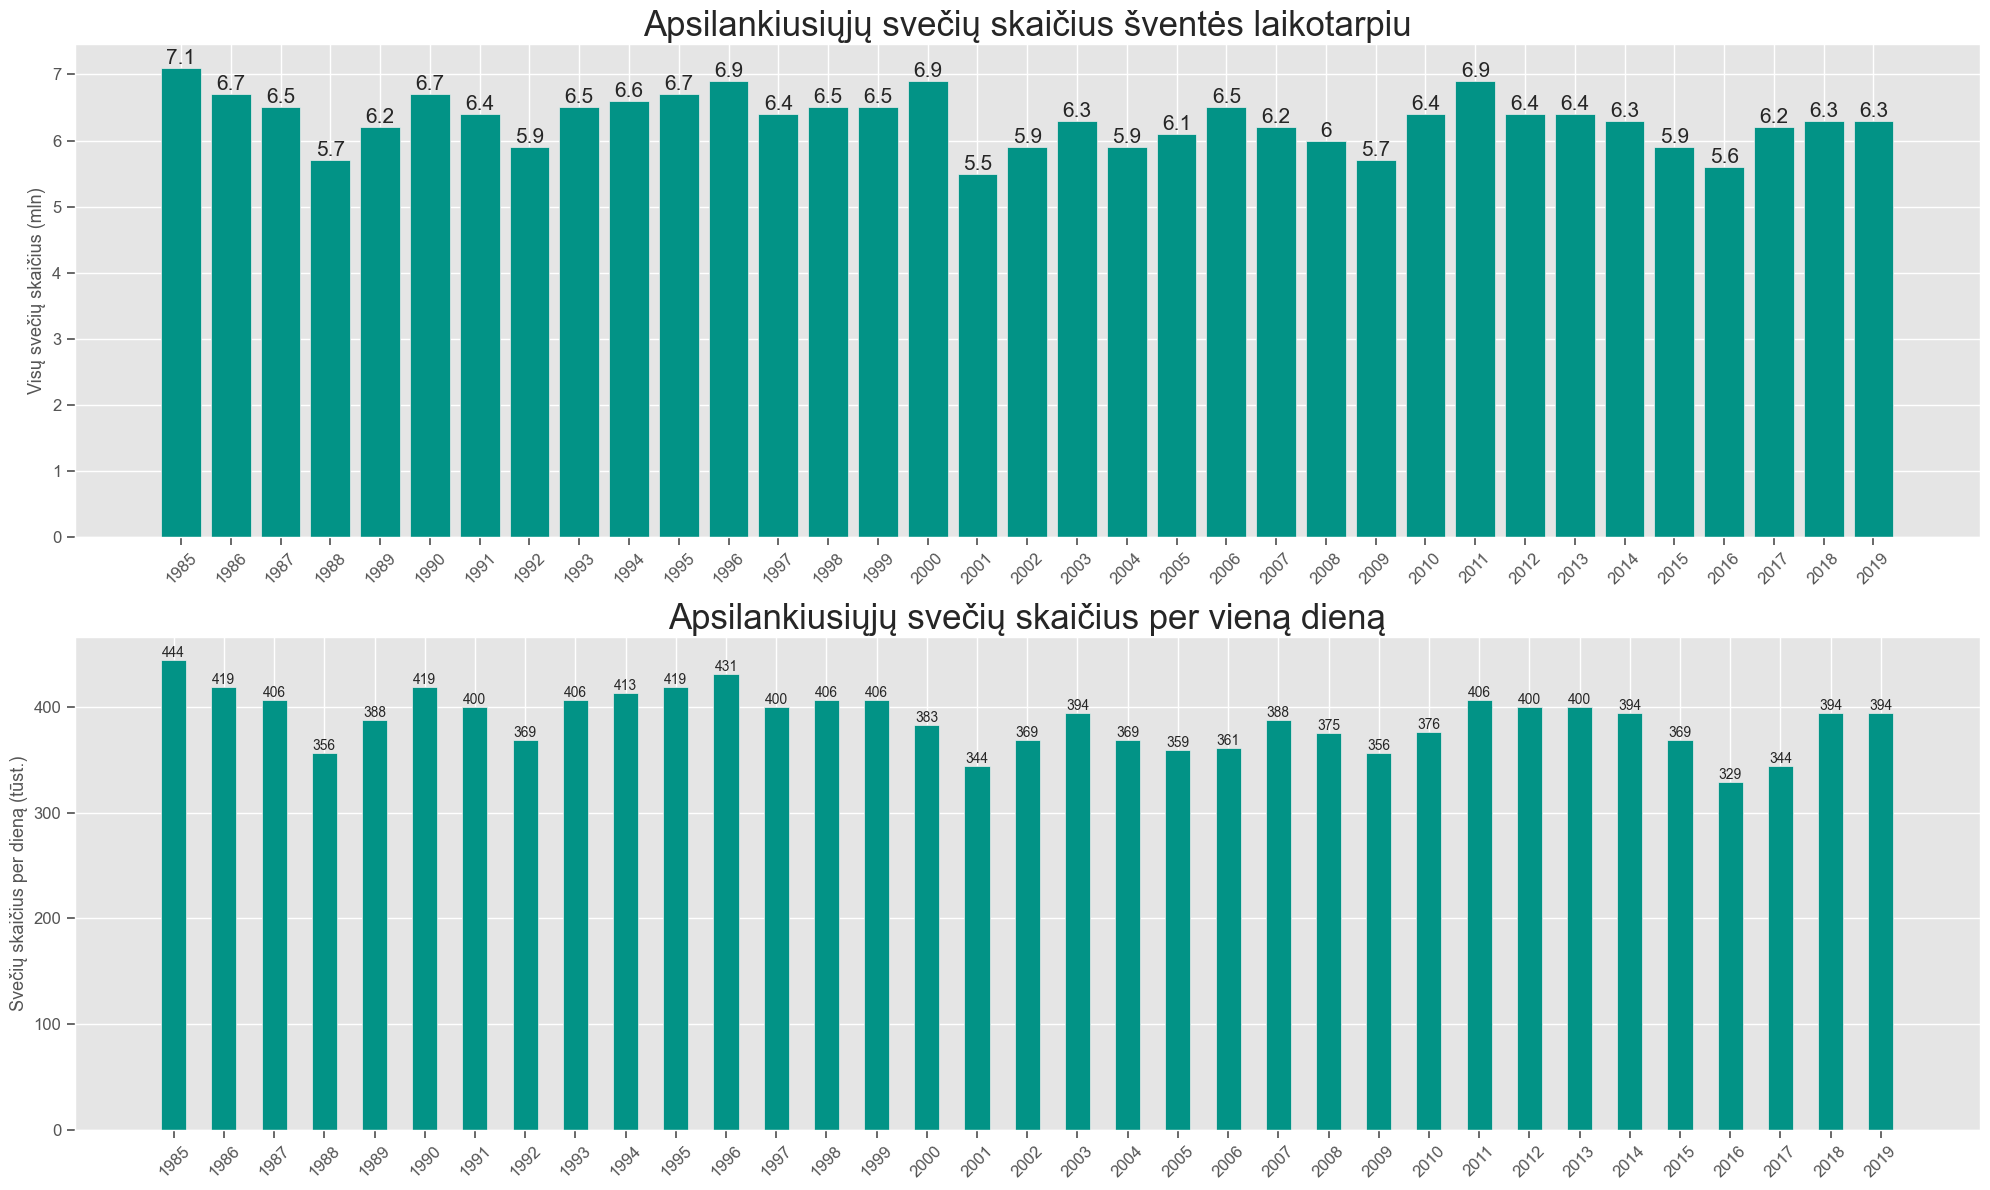

In [600]:
sql = '''select year, `guests_total`, `guests_daily` from oktoberfest order by year'''
c.execute(sql)
sveciai = c.fetchall()

metai = []
svisi = []
sdienos = []

for eil in sveciai:
    metai.append(str(eil[0]))
    svisi.append(float(eil[1]))
    sdienos.append(int(eil[2]))

fig, (axtotal,axday) = plt.subplots(2, figsize=(20,12))

xsv = np.arange(1, len(metai)+1)

V =axtotal.bar(xsv, svisi, width=0.8, color="xkcd:teal")
axtotal.bar_label(V, size=15)
axtotal.set_xticks(xsv)
axtotal.set_xticklabels(metai, rotation=45)
axtotal.set_ylabel('Visų svečių skaičius (mln)', fontsize=13)
axtotal.set_title('Apsilankiusiųjų svečių skaičius šventės laikotarpiu', fontsize=25)
axtotal.tick_params(axis='x', labelsize=12)
axtotal.tick_params(axis='y', labelsize=12)

D = axday.bar(xsv, sdienos, width=0.5, color="xkcd:teal")
axday.bar_label(D)
axday.set_xticks(xsv)
axday.set_xticklabels(metai, rotation=45)
axday.set_ylabel('Svečių skaičius per dieną (tūst.)', fontsize=13)
axday.set_title('Apsilankiusiųjų svečių skaičius per vieną dieną', fontsize=25)
axday.tick_params(axis='x', labelsize=12)
axday.tick_params(axis='y', labelsize=12)

fig.tight_layout()
plt.show()

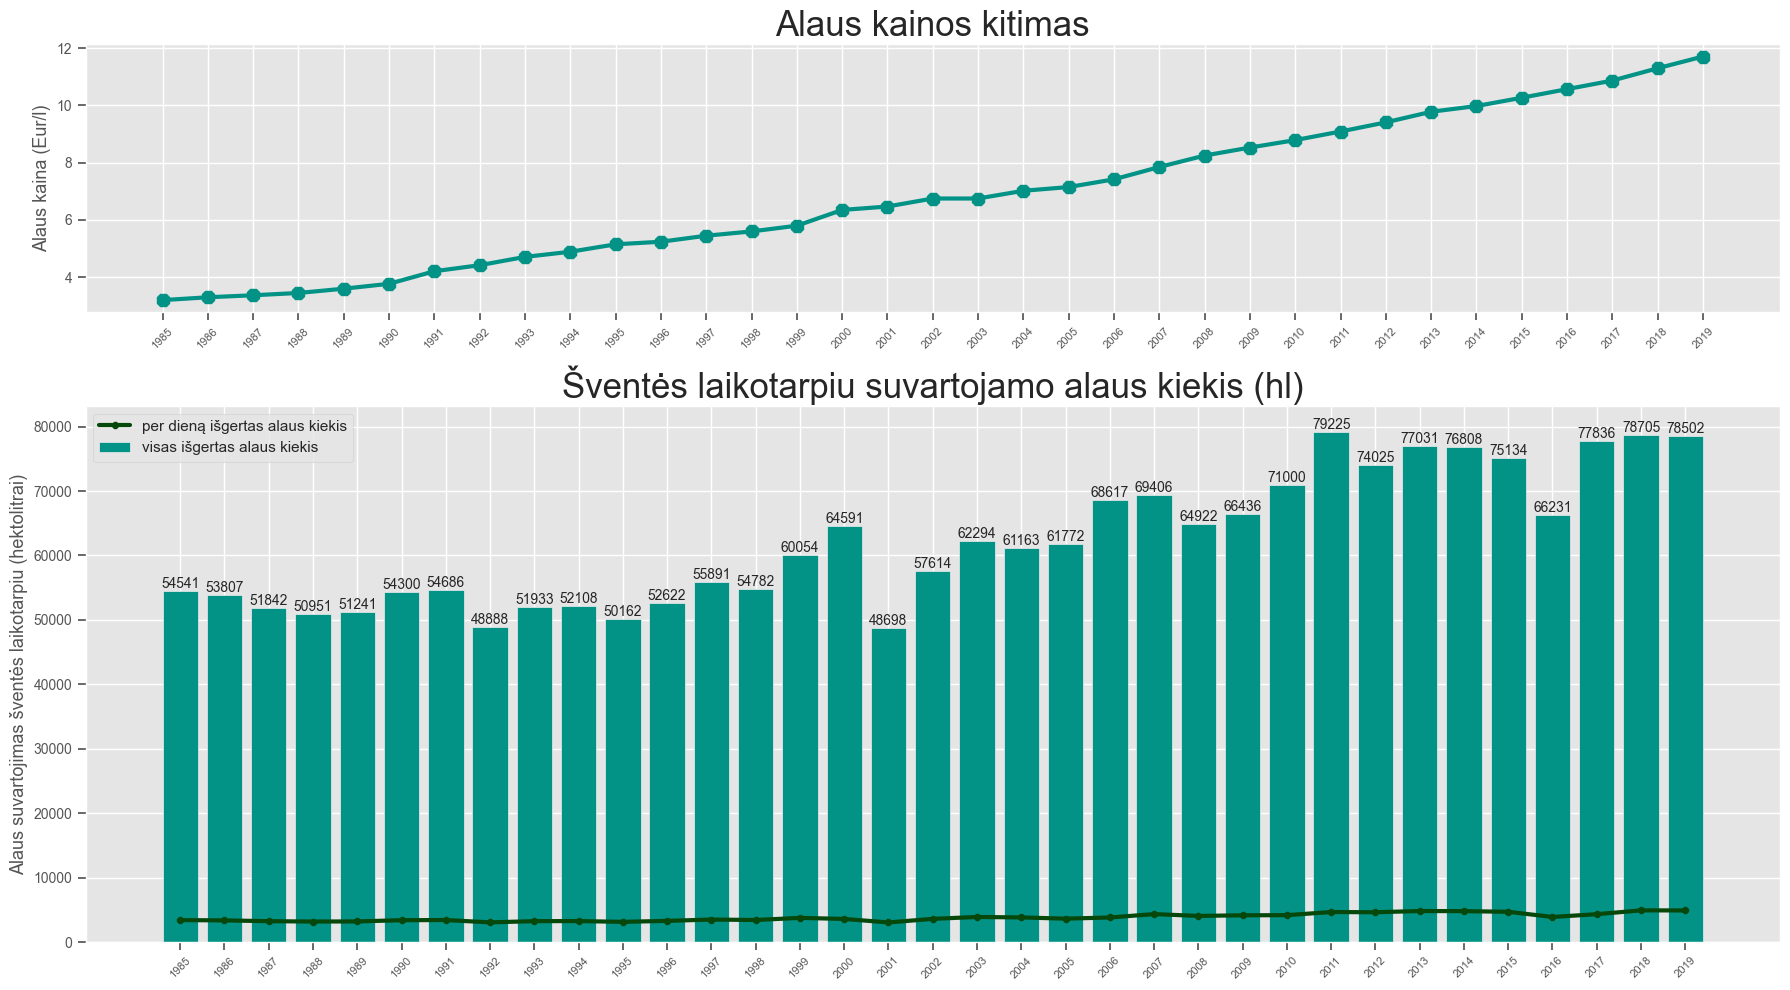

In [601]:
sql = """select year, `beer_price`, `beer_consumption` from oktoberfest order by year"""
c.execute(sql)
alus = c.fetchall()

akaina = [] # alaus kaina Eur/l
avartojimas = [] # alaus suvartojimas hektolitrais (1ht-100l)

for eil1 in alus:
    akaina.append(float(eil1[1]))
    avartojimas.append(float(eil1[2]))

sql = """select year, `beer_consumption`/ `duration` as day_average from oktoberfest order by year"""
c.execute(sql)
alperdiena = c.fetchall()

aldvid = [] # vid per dieną išgerta alaus hl

for eil2 in alperdiena:
    aldvid.append(float(eil2[1]))
 
fig, (axprice, axconsumption) = plt.subplots(2, figsize=(18,10), gridspec_kw={'height_ratios': [1, 2]})

xal = np.arange(1, len(metai)+1)

axprice.plot(xal, akaina, lw=3, marker="8", ms = 10, color="xkcd:teal")
axprice.set_xticks(xal)
axprice.set_xticklabels(metai, rotation=45)
axprice.set_ylabel('Alaus kaina (Eur/l)', fontsize=13)
axprice.set_title('Alaus kainos kitimas', fontsize=25)
axprice.tick_params(axis='x', labelsize=8)
axprice.tick_params(axis='y', labelsize=10)

C = axconsumption.bar(xal, avartojimas, color="xkcd:teal", label="visas išgertas alaus kiekis")
axconsumption.plot(xal, aldvid, lw=3, marker="8", ms = 5, color="xkcd:forest green",  label="per dieną išgertas alaus kiekis")
axconsumption.bar_label(C,  label_type='edge', size=10)

axconsumption.set_xticks(xal)
axconsumption.set_xticklabels(metai, rotation=45)
axconsumption.set_ylabel('Alaus suvartojimas šventės laikotarpiu (hektolitrai)', fontsize=13)
axconsumption.set_title('Šventės laikotarpiu suvartojamo alaus kiekis (hl)', fontsize=25)
axconsumption.tick_params(axis='x', labelsize=8)
axconsumption.tick_params(axis='y', labelsize=10)

axconsumption.legend()
fig.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8064\2025655855.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bp= pd.read_sql_query("""select year, `beer_consumption`, `beer_price` from oktoberfest order by year""", con=DB)


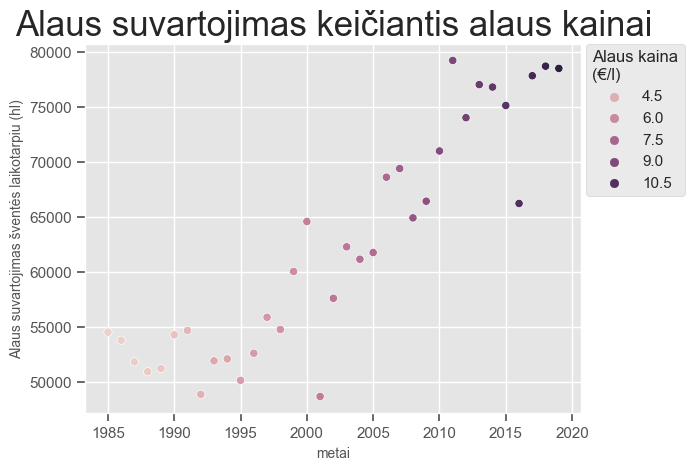

In [602]:
bp= pd.read_sql_query("""select year, `beer_consumption`, `beer_price` from oktoberfest order by year""", con=DB)
sns.scatterplot(x='year', y='beer_consumption', hue='beer_price', data=bp)
plt.xlabel("metai", size=10)
plt.ylabel("Alaus suvartojimas šventės laikotarpiu (hl)", size=10)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='Alaus kaina\n(€/l)')
plt.title("Alaus suvartojimas keičiantis alaus kainai", size=25)
plt.savefig("Seaborn_scatterplot.png", format='png',dpi=150)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8064\2770336753.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beer= pd.read_sql_query("""select year, `beer_consumption`, `beer_price` from oktoberfest where year >= 1999 order by year""", con=DB)


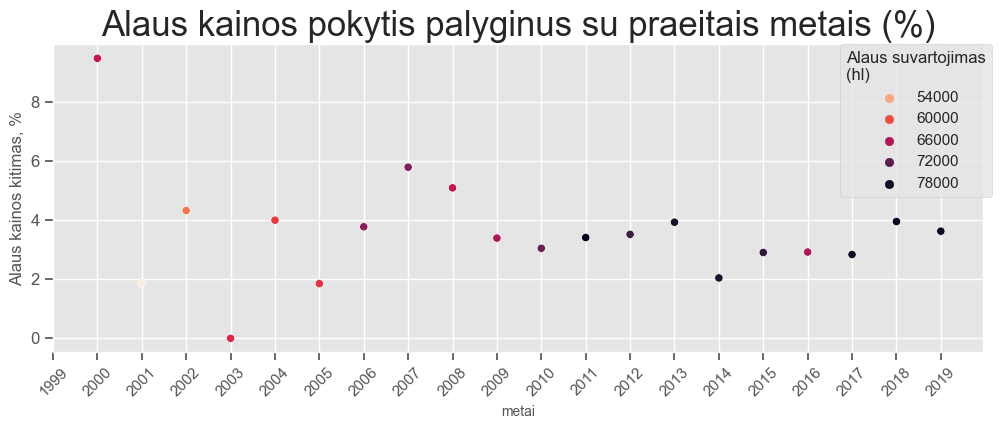

In [603]:
beer= pd.read_sql_query("""select year, `beer_consumption`, `beer_price` from oktoberfest where year >= 1999 order by year""", con=DB)
price = beer['beer_price']
year = beer['year']
beer['procentai']= price.pct_change()*100


fig, axk = plt.subplots(figsize=(12, 4))
sns.scatterplot(x=beer['year'].values.astype(int), y=beer['procentai'], hue=beer['beer_consumption'],  palette="rocket_r", data=beer, ax=axk)
axk.set_xticks(beer['year'].values.astype(int))
axk.set_xticklabels(beer['year'].values.astype(int), rotation=45)

plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='Alaus suvartojimas\n(hl)')
plt.title("Alaus kainos pokytis palyginus su praeitais metais (%)", size = 25)
plt.savefig("Seaborn_scatterplot2.png", format='png',dpi=150)
plt.xlabel("metai", size=10)
plt.ylabel("Alaus kainos kitimas, %", size=12)
axk.tick_params(axis='y', labelsize=12)

plt.show() 

In [604]:
csv = pd.read_csv('oktoberfest.csv')

In [605]:
csv.head(2)

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption
0,1985,16,7.1,444,3.2,54541,4.77,629520
1,1986,16,6.7,419,3.3,53807,3.92,698137


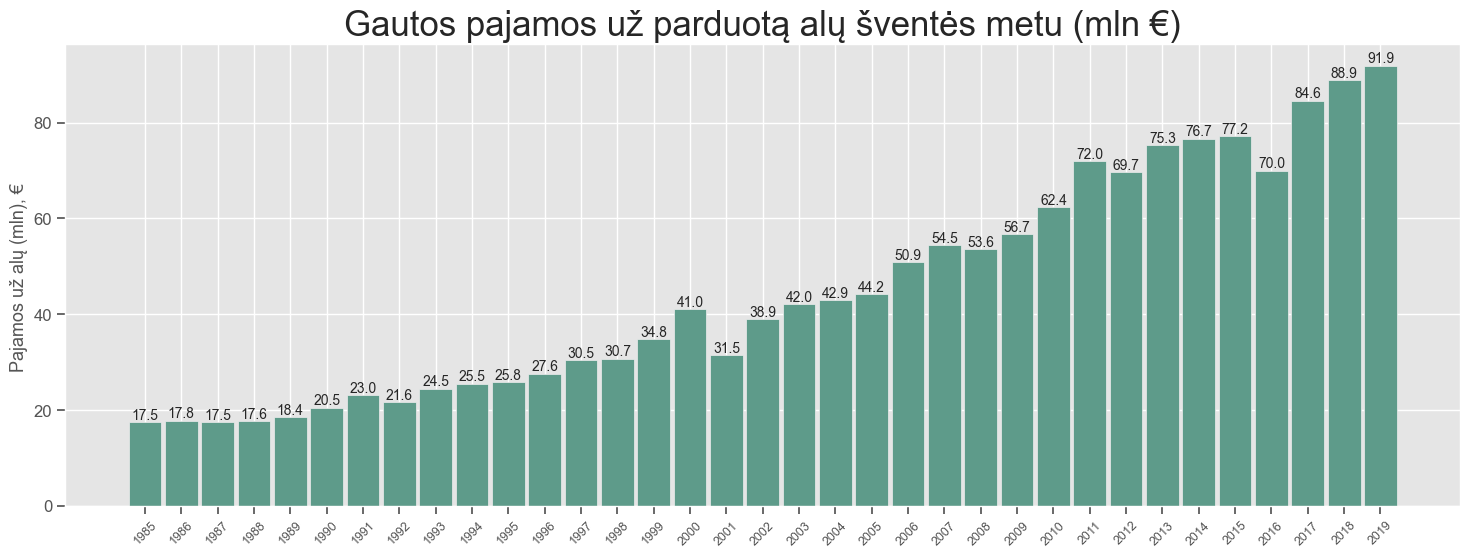

In [606]:
csv['beer_consumption_litres'] = csv['beer_consumption']*100
csv['beer_income'] = (csv['beer_consumption_litres'] * csv['beer_price'])/1000000

fig, axp = plt.subplots(figsize=(18, 6))

eur = axp.bar(csv['year'], csv['beer_income'], color="xkcd:grey teal", width=0.9)
axp.bar_label(eur,  label_type='edge', fmt='%.1f', size=10) 

axp.set_xticks(csv['year'])
axp.set_xticklabels(csv['year'], rotation=45)
axp.set_ylabel('Pajamos už alų (mln), € ', fontsize=13)

axp.set_title('Gautos pajamos už parduotą alų šventės metu (mln €)', fontsize=25)
axp.tick_params(axis='x', labelsize=9)
axp.tick_params(axis='y', labelsize=12)


plt.show()

In [607]:
germany = pd.read_csv('beer_consumption2.csv', ';')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8064\1411071252.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  germany = pd.read_csv('beer_consumption2.csv', ';')


In [608]:
germany.head(2)

,year,consumption of beer (hectoliters)
0,2020,78716000
1,2019,82933000


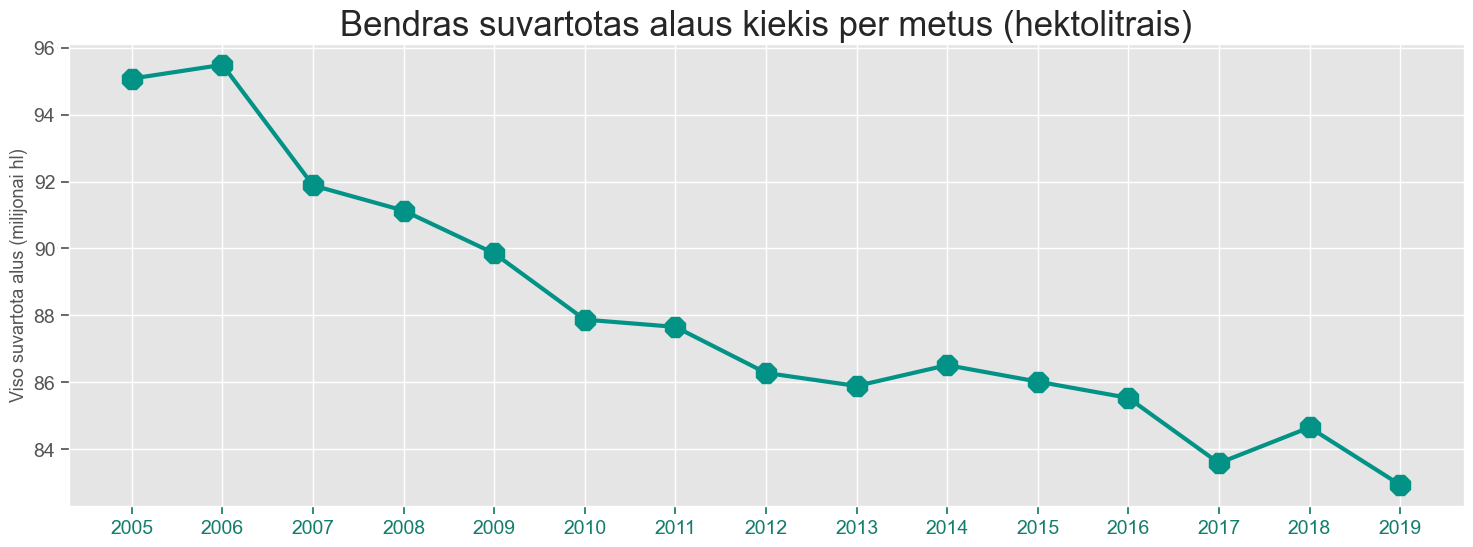

In [609]:
totbeer = germany.loc[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
DE = totbeer[::-1]
fest= csv.loc[[20, 21,22,23,24,25,26,27,28,29,30,31,32,33,34]]

f, ax = plt.subplots(figsize=(18, 6))
met = np.arange(1, len(DE['year'])+1)

ax.plot(met, (DE['consumption of beer (hectoliters)'])/1000000, lw=3, marker="8", ms = 15, color="xkcd:teal")
ax.set_xticks(met)
ax.set_xticklabels(DE['year'])
ax.set_ylabel('Viso suvartota alus (milijonai hl)', fontsize=13)
ax.set_title('Bendras suvartotas alaus kiekis per metus (hektolitrais)', fontsize=25)
ax.tick_params(axis='x', labelsize=14, colors='xkcd:blue green')
ax.tick_params(axis='y', labelsize=14)
plt.show()

In [610]:
cap = pd.read_csv('beer_per_capita.csv', ';')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8064\3521102800.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  cap = pd.read_csv('beer_per_capita.csv', ';')


In [611]:
cap.head()

,year,per capita (in liters)
0,2021,91.6
1,2020,94.6
2,2019,99.7
3,2018,102.0
4,2017,102.0


In [612]:
sns.set_theme(style="ticks")

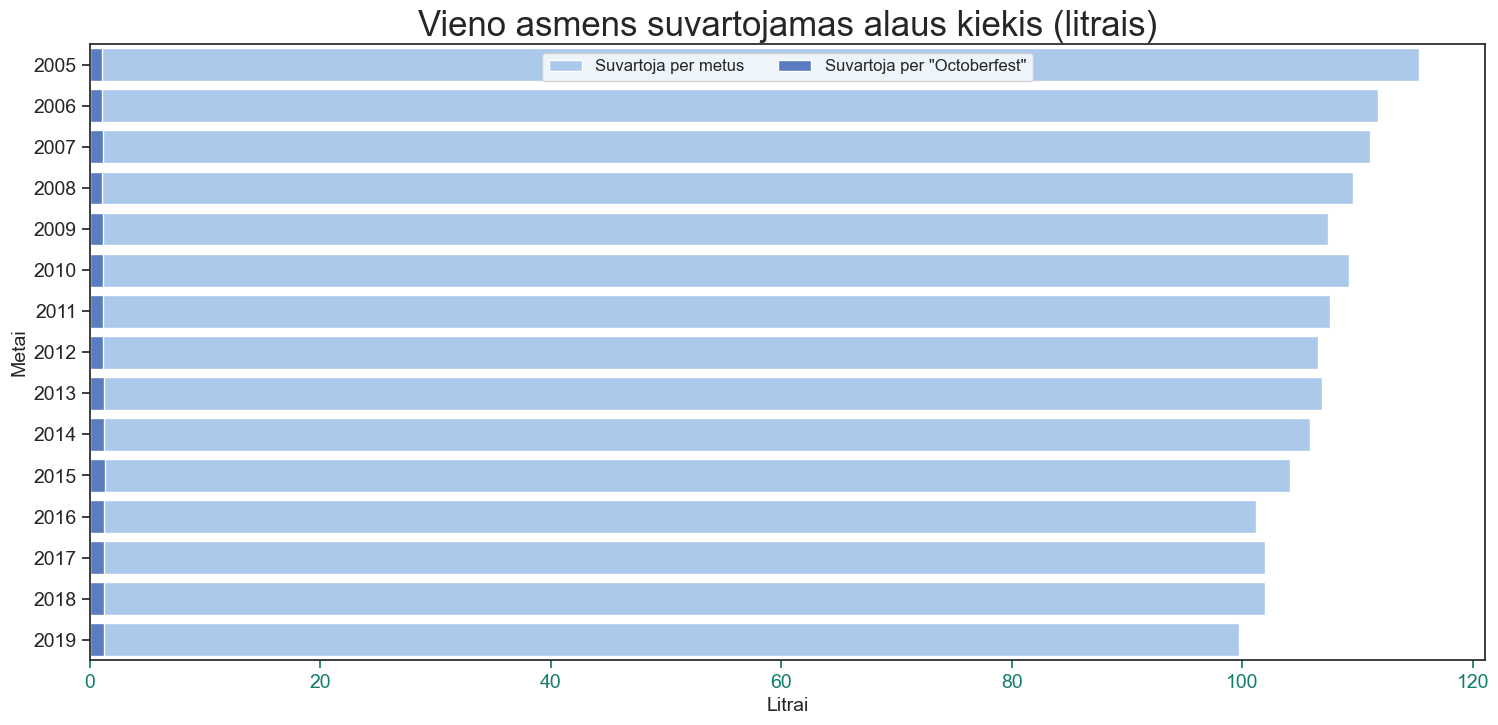

In [613]:
capita = cap.loc[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]] 
lperc = capita[::-1]
fest1= csv.loc[[20, 21,22,23,24,25,26,27,28,29,30,31,32,33,34]]
fest1['lperperson'] = (fest1['beer_consumption']*100)/ (fest1['guests_total']*1000000)


fig, ax1 = plt.subplots(figsize=(18,8))

sns.set_color_codes("pastel")
sns.barplot(x='per capita (in liters)', y='year', data=lperc, label="Suvartoja per metus", color="b", orient="h")

sns.set_color_codes("muted")
sns.barplot(x='lperperson', y='year', data=fest1, label='Suvartoja per "Octoberfest"', color="b", orient='h')

ax1.legend(ncol=2, loc="upper center", frameon=True, fontsize=12)
ax1.set_title( "Vieno asmens suvartojamas alaus kiekis (litrais)" , size = 25 )
ax1.set_ylabel( "Metai", size = 14)
ax1.set_xlabel( "Litrai" , size = 14 )
ax1.tick_params(axis='x', labelsize=14, colors='xkcd:blue green')
ax1.tick_params(axis='y', labelsize=14)

plt.show()

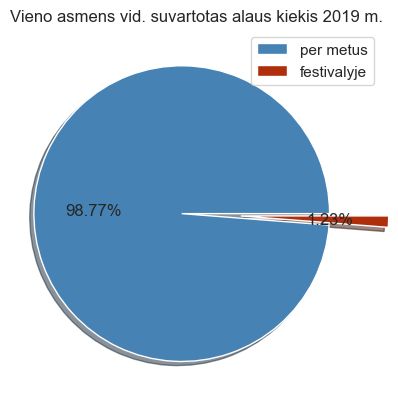

In [632]:
de2019 = cap.loc[2,:]
fest2019= fest1.loc[34,:]
sk = [de2019['per capita (in liters)'],fest2019['lperperson']]
colors = ['steelblue', 'xkcd:rusty red']
lable = ['per metus', 'festivalyje']

fig, axd = plt.subplots()

axd.pie(sk, explode=[0.1, 0.3], shadow=True, autopct='%1.2f%%', colors=colors)
plt.title("Vieno asmens vid. suvartotas alaus kiekis 2019 m.")

plt.legend(lable, loc='upper right')
plt.show()

IŠVADOS:
1. "Octoberfest" šventėje, kuri trunka 16-18 dienų, apsilanko pakankamai didelis skaičius svečių. Didžiausias svyravymas matomas 2001 m. bei 2016 m. 
2. Alaus kaina kiekvienais metais didėja, tačiau tai nesumažina suvartojamo alaus kiekio, jis taip pat didėja.
3. Didėjančios alaus kainos bei didėjantis alaus vartojimas, lemia ir augantčias pajamas už alaus pardavimus.
4. Tačiau bendrai pažiūrėjus į visoje Vokietijoje suvartojamo alaus kiekį, matomas vartojimo mažėjimas. Tačiau jis išlieka pakankamai didelis. Vokietija pasaulio reitinguose yra 10-tuko viduryje.

In [ ]:
csv = pd.read_csv('oktoberfest.csv')
germany = pd.read_csv('beer_consumption2.csv', ';')
cap = pd.read_csv('beer_per_capita.csv', ';')